# Time Series Analysis

This lecture summarizes the fundamental concepts and tools for analyzing time series data. Time series analysis is a branch of applied mathematics developed
mostly in the fields of signal processing and statistics. Contributions to this field, from an astronomical perspective, have predominantly focused on unevenly sampled data, low signal-to-noise data, and heteroscedastic errors. Even when limited to astronomical data sets, the diversity of potential applications is enormous. The most common applications range from the detection of variability and periodicity to the treatment of nonperiodic variability and searches for localized events.

Within time-domain data, measurement errors can range from as small as one
part in 100,000 to potential events buried in noise. Data sets can include many billions of data points, and sample sizes can be in the millions. Upcoming surveys, such as Gaia and LSST, will increase existing data sets by large factors. Scientific utilization of such data sets will include searches for extrasolar planets; tests of stellar astrophysics through studies of variable stars and supernova explosions; distance determination (e.g., using standard candles such as Cepheids, RR Lyrae, and supernovas); and fundamental physics such as tests of general relativity with radio pulsars, cosmological studies with supernovas and searches for gravitational wave events.

## Modeling Toolkit for Time Series Analysis

The main tools for time series analysis belong to either the time domain or the
frequency domain. Many of the tools and methods discussed in earlier lectures
play a prominent role in the analysis of time series data.


### Parameter Estimation, Model Selection, and Classification for Time Series Data

Detection of a signal, whatever it may be, is essentially a hypothesis testing or model selection problem. The quantitative description of a signal belongs to parameter estimation and regression problems. Once such a description is available for a set of time series data (e.g., astronomical sources from families with distinctive light curves), their classification utilizes essentially the same methods as discussed in the preceding lectures.

In general, we will fit a model to a set of N data points $(t_j, y_j)$, $j = 1,..., N$ with known errors for $y$,

$$
\begin{equation*}
y_i(t_j) = \sum^M_{m=1}\beta_mT_m(t_j|\theta_m)+\epsilon_j\text{,}
\end{equation*}
$$

where the function $T_m(t|\theta_m)$ need not be periodic, nor do the times $t_j$ need to be evenly sampled. As before, the vector $\theta_m$ contains model parameters that describe each $T_m(t)$ (the symbol $|$ here means "given parameters $\theta_m$). Common deterministic models for the underlying process that generates data include $T(t) = \text{sin}(\omega t)$ and $T(t)=\text{exp}(-\alpha t)$, where the frequency $\omega$ and decay rate $\alpha$ are model parameters to be estimated from the data. Another important model is the so-called "chirp signal," $T(t) = \text{sin}(\phi+\omega t+\alpha t^2)$. In the equation above $\epsilon$ stands for noise, which is typically described by heteroscedastic Gaussian
errors with zero mean and parametrized by known $\sigma_j$. Note that in this lecture, we have changed the index for data values from $i$ to $j$ because we will frequently
encounter the imaginary unit $i = \sqrt{−1}$.

Finding whether data favor such a model over the simplest possibility of no
variability ($y(t)=\text{constant} + \text{noise}$) is no different from model selection problems
discussed earlier, and can be addressed via the Bayesian model odds ratio, or
approximately using AIC and BIC criteria. Given a quantitative description
of time series $y(t)$, the best-fit estimates of model parameters $\theta_m$ can then be used as
attributes for various supervised and unsupervised classification methods (possibly
with additional attributes that are not extracted from the analyzed time series).
Depending on the amount of data, the noise behavior (and our understanding
of it), sampling, and the complexity of a specific model, such analyses can range from
nearly trivial to quite complex and computationally intensive.

###### TODO: Example here

### Fourier Analysis

Fourier analysis plays a major role in the analysis of time series data. In Fourier analysis, general functions are represented or approximated by integrals or sums of simpler trigonometric functions. As first shown in 1822 by Fourier himself in
his analysis of heat transfer, this representation often greatly simplifies analysis. The code and figure below illustrates how an RR Lyrae light curve can be approximated by a sum
of sinusoids (details are discussed in later in this secion). The more terms that are included in the sum, the better is the resulting approximation. For periodic functions, such as periodic light curves in astronomy, it is often true that a relatively small number of terms (less than 10) suffices to reach an approximation precision level similar to the measurement precision.

The most useful applications of Fourier analysis include convolution and deconvolution, filtering, correlation and autocorrelation, and power spectrum estimation. The use of these
methods is by no means limited to time series data; for example, they are often used
to analyze spectral data or in characterizing the distributions of points. When the
data are evenly sampled and the signal-to-noise ratio is high, Fourier analysis can be
a powerful tool. When the noise is high compared to the signal, or the signal has a
complex shape (i.e., it is not a simple harmonic function), a probabilistic treatment
(e.g., Bayesian analysis) offers substantial improvements, and for irregularly (unevenly) sampled data probabilistic treatment becomes essential. For these reasons,
in the analysis of astronomical time series, which are often irregularly sampled with
heteroscedastic errors, Fourier analysis is often replaced by other methods Nevertheless, most of the main concepts introduced in Fourier analysis carry over to those other methods and thus
Fourier analysis is an indispensable tool when analyzing time series. 

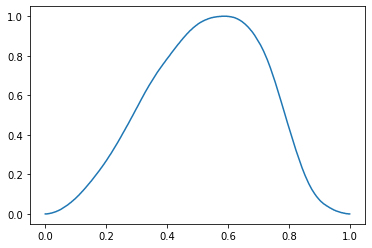

In [44]:
import matplotlib.pyplot as plt
import numpy as np

templates = np.load('data/rrlyrae_templates.npy', allow_pickle=True)

plt.plot(templates[0]['t'], templates[0]['v'])

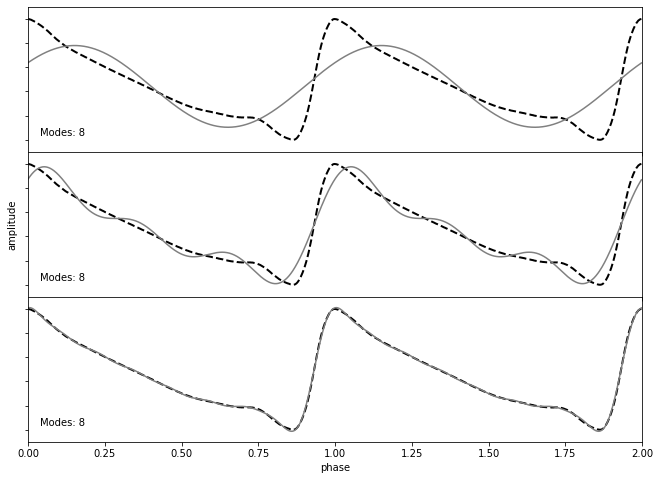

In [45]:
# Select rr lyrae 115g
x = templates[79]['t']
y = templates[79]['v']

# Create figure
fig = plt.figure(figsize=(11, 8))
fig.subplots_adjust(hspace=0)

ks = [1, 3, 8]
subplots = [311, 312, 313]

for i in range(3):
    # Get axis to current subplot
    ax = fig.add_subplot(subplots[i])

    # Use FFT to fit a truncated Fourier series
    y_fft = np.fft.fft(y)
    y_fft[ks[i] + 1:-ks[i]] = 0
    y_fit = np.fft.ifft(y_fft).real

    # We'll plot two cycles (periods). Concatenate x with x+1, and y/y_fit with itself
    new_x = np.concatenate([x, 1 + x])
    new_y = np.concatenate([y, y])
    new_y_fit = np.concatenate([y_fit, y_fit])
    
    # Generate the plot    
    ax.plot(new_x, new_y, '--k', lw=2)
    ax.plot(new_x, new_y_fit, color='gray')

    # Add a label for each mode
    label = "Modes: {}".format(k)
    ax.text(0.02, 0.1, label, ha='left', va='bottom', transform=ax.transAxes)

    # Remove ticks and label in subplots which are not at the edge
    if subplots[i] == subplots[-1]:
        ax.set_xlabel('phase')
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    if subplots[i] == subplots[1]:
        ax.set_ylabel('amplitude')
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    
    # Set axis range limit
    ax.set_xlim(0, 2)
    ax.set_ylim(1.1, -0.1)

# Show the plot
plt.show()

The Fourier Transofrm of a function $h(t)$ is defined as

$$
\begin{equation*}
H(f) = \int^{\infty}_{-\infty} h(t)\,\text{exp}(-i2\pi ft)\,dt
\end{equation*}
$$

with inverse transformation

$$
\begin{equation*}
h(t) = \int^{\infty}_{-\infty} H(f)\,\text{exp}(i2\pi ft)\,df
\end{equation*}
$$

where $t$ is time in seconds and $f$ is frequency in Hz.

#### Convolution Theorem

A convolution of two functions $a(t)$ and $b(t)$ is given by

$$
\begin{equation*}
(a*b)(t) \equiv \int^\infty_{-\infty} a(t')b(t-t')dt'
\end{equation*}
$$

Convolution is an unavoidable result of the measurement process because the measurement resolution, whether in time, spectral, spatial, or any other domain, is never infinite. For example, in astronomical imaging the true intensity distribution on the sky is convolved with the atmospheric seeing for ground-based imaging, or the telescope diffraction pattern for space-based imaging (radio astronomers use the term "beam convolution"). In the above equation, the function $a$ can be thought of as the "convolving pattern" of the measuring apparatus, and the function $b$ is the signal. In practice, we measure the convolved (or smoothed) version of our signal, $[a*b](t)$, and seek to uncover the original signal $b$ using the presumably known $a$.

The convolution theorem states that if $h=a*b$, then the Fourier transforms of $h$, $a$ and $b$ are related by their pointwise products:

$$
\begin{equation*}
H(f) = A(f)B(f)
\end{equation*}
$$

Thus a convolution of two functions is transformed into a simple multiplication of the associated Fourier representations. Therefore, to obtain $b$, we can simply take the inverse Fourier transform of the ration $H(f)/A(f)$. In the absence of noise, this operation is exact. The figure below show a schematic representation of the convolution theorem. The top-left panel shows simulated data (black line); this time series is convolved with a top-hat function (gray boxes). The top-right panels show the Fourier transform of the data and the window function. These can be multiplied together (bottom-right panel) and inverse transformed to find the convolution (bottom-left panel), which amounts to integrating the data over copies of the window at all locations. The result in the bottom-left panel can be viewed as a signal shown in the top-left panel smoothed with the window (top-hat) function. 

<img src="img/convolution.PNG">

Let's see how we can perform the above using Python:

In [ ]:
# First generate some rabdo